# Criando o dataset que sera utilizado para o cruzamento de dados e Machine Learning

In [1]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [2]:
##################3 EXPORTANDO OS DATASET SEMANAIS 
Dolar = pd.read_csv("DolarDiario.csv",sep=";")
IndIndAlimento = pd.read_csv("indusaliment.csv",sep=";")
IndIndBebida = pd.read_csv("indusbebida.csv",sep=";")
IndIndFatura = pd.read_csv("indusfatura.csv",sep=";")
IndIndMaquina = pd.read_csv("indusmaquina.csv",sep=";")
IndIndMetal = pd.read_csv("indusmetal.csv",sep=";")
IndIndTextil = pd.read_csv("industextil.csv",sep=";")
IndIndTransfor = pd.read_csv("industranf.csv",sep=";")
Vendas = pd.read_csv("Vendas.csv",sep=";")
VolVarejo = pd.read_csv("volvendavarejo.csv",sep=";")
DatasetCompleto = pd.read_csv("DolarDiario.csv",sep=";")

In [3]:
#VendasSemanal.QtdVendas[11] = 27.159278
#Vendas.head(50)

In [4]:
#VendasSemanal.QtdVendas[11] = 27.159277504105084
DatasetCompleto['QtdVendas'] = Vendas['QtdVendas']
DatasetCompleto['VolVarejo'] = VolVarejo['VolVarejo']
DatasetCompleto['FaturamentoIndust'] = IndIndFatura['FaturamentoIndust']
DatasetCompleto['IndsBebida']= IndIndBebida['IndsBebida']
DatasetCompleto['IndsMaquina'] = IndIndMaquina['IndsMaquina']
DatasetCompleto['IndsMetal'] = IndIndMetal['IndsMetal']
DatasetCompleto['IndsTextil'] = IndIndTextil['IndsTextil']
DatasetCompleto['IndsTransf'] = IndIndTransfor['IndsTransf']
DatasetCompleto['IndsAlimen'] = IndIndAlimento['IndsAlimen']

DatasetCompleto['Data']= pd.to_datetime(DatasetCompleto['Data'],format='%Y/%m/%d')

DatasetCompleto['QtdVendas'] = pd.to_numeric(DatasetCompleto['QtdVendas'])
DatasetCompleto['VolVarejo'] = pd.to_numeric(DatasetCompleto['VolVarejo'])
DatasetCompleto['FaturamentoIndust'] = pd.to_numeric(DatasetCompleto['FaturamentoIndust'])
DatasetCompleto['IndsBebida']= pd.to_numeric(DatasetCompleto['IndsBebida'])
DatasetCompleto['IndsMaquina'] = pd.to_numeric(DatasetCompleto['IndsMaquina'])
DatasetCompleto['IndsMetal'] = pd.to_numeric(DatasetCompleto['IndsMetal'])
DatasetCompleto['IndsTextil'] = pd.to_numeric(DatasetCompleto['IndsTextil'])
DatasetCompleto['IndsTransf'] = pd.to_numeric(DatasetCompleto['IndsTransf'])
DatasetCompleto['IndsAlimen'] = pd.to_numeric(DatasetCompleto['IndsAlimen'])


In [5]:
DatasetCompleto.head()

,Data,PrecoDolar,QtdVendas,VolVarejo,FaturamentoIndust,IndsBebida,IndsMaquina,IndsMetal,IndsTextil,IndsTransf,IndsAlimen
0,2014-01-08,2.3773,28,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
1,2014-01-09,2.3954,0,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
2,2014-01-10,2.3813,10,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
3,2014-01-13,2.3485,49,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
4,2014-01-14,2.3611,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6


In [6]:
range = DatasetCompleto.Data
df=pd.DataFrame(index = DatasetCompleto.Data)

DatasetCompleto['PrecoDolar'].reset_index(drop=True, inplace=True)
DatasetCompleto['QtdVendas'].reset_index(drop=True, inplace=True)
DatasetCompleto['VolVarejo'].reset_index(drop=True, inplace=True)
DatasetCompleto['FaturamentoIndust'].reset_index(drop=True, inplace=True)
DatasetCompleto['IndsBebida'].reset_index(drop=True, inplace=True)
DatasetCompleto['IndsMaquina'].reset_index(drop=True, inplace=True)
DatasetCompleto['IndsMetal'].reset_index(drop=True, inplace=True)
DatasetCompleto['IndsTextil'].reset_index(drop=True, inplace=True)
DatasetCompleto['IndsTransf'].reset_index(drop=True, inplace=True)
DatasetCompleto['IndsAlimen'].reset_index(drop=True, inplace=True)

df['PrecoDolar'] = DatasetCompleto['PrecoDolar'].values
df['QtdVendas'] = DatasetCompleto['QtdVendas'].values
df['VolVarejo'] = DatasetCompleto['VolVarejo'].values
df['FaturamentoIndust'] = DatasetCompleto['FaturamentoIndust'].values
df['IndsBebida'] = DatasetCompleto['IndsBebida'].values
df['IndsMaquina'] = DatasetCompleto['IndsMaquina'].values
df['IndsMetal'] = DatasetCompleto['IndsMetal'].values
df['IndsTextil'] = DatasetCompleto['IndsTextil'].values
df['IndsTransf'] = DatasetCompleto['IndsTransf'].values
df['IndsAlimen'] = DatasetCompleto['IndsAlimen'].values


In [7]:
df['QtdVendas'].mean()

34.57471264367816

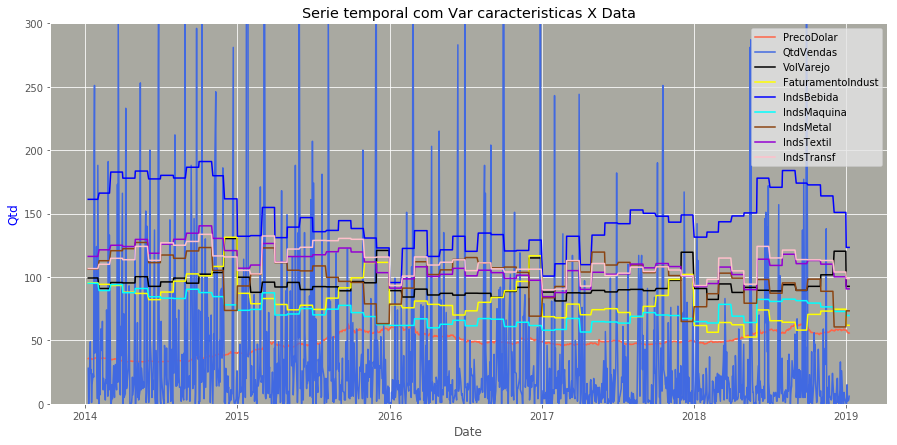

In [14]:
##################### RESAMPLE SEMANAL  ############################
import pylab
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(df.index, df['PrecoDolar']*15,'tomato',df['QtdVendas'], 'royalblue',df['VolVarejo'],'black',df['IndsBebida'],'yellow',df['IndsMaquina'],'b',df['IndsMetal'],'aqua',df['IndsTextil'],'saddlebrown',df['IndsTransf'],'darkviolet',df['IndsAlimen'],'pink')
#ax.plot(df.index, df['QtdVendas'], 'b-')

plt.title('Serie temporal com Var caracteristicas X Data') #adicionando o título

plt.legend(df, prop={'size': 10})
plt.ylim(0, 300)
ax1.set_xlabel('Date')
ax1.set_ylabel('Qtd', color='b')
ax1.set_facecolor('#A9A9A1')
plt.show()
plt.rcParams['figure.figsize'] = (15,7)

In [9]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics